# (E16) 흐린 사진을 선명하게
- 일시: 2021.03.09

****

# SRGAN로 구조를 이용해 프로젝트를 수행해보자.

*****

## Super Resolution 활용 사례
- **CCTV, 의료영상, 영상 리마스터링 등등**

## Super Resolution을 어렵게 만드는 요인

> **<Super Resolution 모델 학습을 위한 데이터 구성 방법>**    
> **1. 고해상도 이미지 준비**    
> **2. 특정한 처리 과정을 거쳐 저해상도 이미지를 생성**    
> **3. 생성된 저해상도 이미지를 입력으로 원 고해상도 이미지를 복원하도록 학습을 진행.**  

- **1. ill-posed (inverse) problem: 1개의 저해상도 이미지에 대해 여러 개의 고해상도 이미지가 나올 수 있는 문제.**    
     
     
     
- **2. Super Resolution 문제의 복잡도: 원래 가진 제한된 정보만을 이용해 많은 정보를 만들어내는 과정은 매우 복잡하여 잘못된 정보를 만들어 낸 가능성이 있음. 이 문제는 원래 가진 이미지의 해상도 보다 더 높은 해상도로 Super Resolution 할수록 점점 심해짐.**      

- **이미지 제목에 있는 정량적인 평가는 높을수록 더 원분 이미지와 비슷함을 말함.    
 --> 정량적 평가 척도와 사람이 시각적으로 관찰하여 내린 평가가 잘 일치하지 않을 수 있음.**   
 
## Super Resolution하는 쉬운 방법

### Interpolation
- **알려진 값을 가진 두 점 사이 어느 지점의 값이 얼마일지를 추정하는 기법.**    
- **선형보간법(linear interpolation): 두 지점의 좌표를 알고 1차 함수식을 만들어 알고자하는 지점의 x값을 넣어 y값을 찾는 것.**    
- **삼차보간법(cubic interpolation): 3차 함수를 하나 가정하고, 주어진 두 지점의 좌표값을 대입해서 연립방정식으로 풀이함. 그리고 이웃한 두 개의 점은 더 참조(총 4개의 점 참조)하여 모든 미지수의 값을 찾아 식을 정립하고 x값을 넣어서 y값을 찾는 것.**     
- **쌍선형보간법(bilinear interpolation): 선형보간법을 2차원으로 확장시킨 것. 원리 상 달라진 것은 없으나 이웃한 4개의 점을 참조함.**    
- **쌍삼차보간법(bicubic interpolation): 삼차보간법을 2차원으로 확장시킨 것. 원리 상 달라진 것은 없으나 이웃한 16개의 점을 참조함.**    

## Deep Learning을 이용한 Super Resolution, SRCNN
- **논문 <"Image Super-Resolution Using Deep Convolutional Networks">에서 사용된 모델.**

> **1. 저해상도 이미지(LR)를 쌍삼차보간법을 이용해서 원하는 크기로 늘림 --> ILR.**     
> **(SRCNN은 ILR을 입력으로 사용.)**    
> **2. 3개의 Conv layer를 거쳐 고해상도 이미지를 생성.**    
> **3. 생성된 고해상도 이미지와 실제 고해상도 이미지 사이의 차이를 역전파하여 신경망의 가중치를 학습.**    

## SRCNN 이후 제안된 구조

### VDSR (Very Deep Super Resolution)
- **SRCNN보다 많은 20개의 Conv layer를 사용.**    
- **최종 고해상도 이미지 생성 직전에 처음 입력 이미지를 더하는 residual learning을 이용.** 

### RDN (Residual Dense Network)
- **conv layer를 거친 출력을 최대한 활용하도록 출력이 화살표를 따라 이후 연산에서 여러 번 재활용함.**    

### RCAN (Residual Channel Attention Networks)
- **conv layer의 출력인 각각의 특징 맵을 대상으로 채널 간의 모든 정보가 균일한 중요도를 갖는 것이 아니라 일부 중요한 채널에만 선택적으로 집중하도록 유도(channel attention).**

## Deep Learning을 이용한 Super Resolution, SRGAN
- **논문<"Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network">에서 제안된 모델.**    
- **Generator가 저해상도 이미지를 입력 받아 가짜 고해상도 이미지를 생성해내면, Discriminator는 생성된 가짜 고해상도 이미지와 진짜 원래 고해상도 이미지 중 진짜를 판별.**   


- **SRGAN의 loss function은 content loss와 adversarial loss로 구성.**    
- **loss function는 Generator를 이용해 얻어낸 가짜 고해상도 이미지를 진짜 원래 고해상도 이미지와 직접 비교하는 것이 아니라, 각 이미지를 이미지넷으로 사전학습된 VGG 모델에 입력하여 나오는 feature map에서의 차이를 계산. --> SRGAN은 생성된 고해상도 이미지와 실제 고해상도 이미지를 VGG에 입력하여 모델 중간에서 추출해낸 특징을 비교해서 loss를 계산.**    
- **SRGAN은 VGG를 이용한 content loss 및 GAN을 사용함으로써 발생하는 adversarial loss를 합하여 최종적으로 perceptual loss라고 정의하며 이를 학습에 이용**

## 결과 평가/비교(정량적 평가 척도)

### PSNR(Peak Signal-to-Noise Ratio)
- **영상 내 신호가 가질 수 있는 최대 신호에 대한 잡음의 비율.**   
- **일반적으로 영상을 압축했을 때 화질이 얼마나 손실되었는지 평가하는 목적으로 사용.**    
- **데시벨(db) 단위를 사용하며, PSNR 수치가 높을수록 원본 영상에 비해 손실이 적다는 의미.    
 --> 높을수록 좋음.(상한값이 없음 = inf)**

### SSIM(Structural Similarity Index Map)
- **영상의 구조 정보를 고려하여 얼마나 구조 정보를 변화시키지 않았는지를 계산.**    
- **특정 영상에 대한 SSIM 값이 높을수록 원본 영상의 품질에 가깝다는 의미.     
 --> 값이 높을수록 좋음.(0과 1 사이의 값을 가짐.)**
 
**=> 해상도를 줄일수록 그 이미지를 원래 크기로 interploation 했을 때, 각각의 계산 결과가 눈에 띄게 감소함.**

## 다른 이미지를 참고하는 방법, RefSR(Reference-based Super Resolution)
- **모델에게 저해상도 이미지 하나만을 주고 고해상도 이미지를 생성하라고 시키는 것이 아니라 해상도를 높이는 데 참고할 만한 다른 이미지를 같이 제공해주는 방법.**    
-**논문<"mage Super-Resolution by Neural Texture Transfer">에서 제안한 방법을 사용하면 보다 선명한 고해상도 이미지를 얻을 수 있음.**

*****

# Project 1. 직접 고른 이미지로 SRGAN 실험하기

## Project 1-1: 보간법, SRGAN, HR 비교하기

In [1]:
# 라이브러리 준비. 
import os
import cv2
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

(1080, 1920, 3)


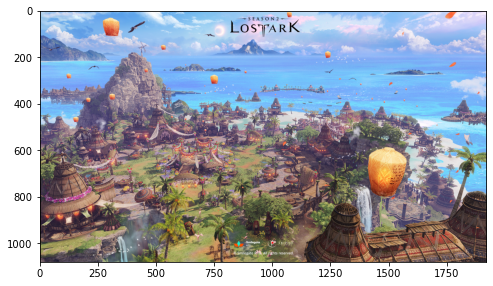

In [2]:
# 고해상도 이미지 불러오기.
image_path = os.getenv('HOME')+'/aiffel/super_resolution/lostark_papunika.jpg'
original_image = cv2.imread(image_path) 

print(original_image.shape) #(세로 픽셀 수, 가로 픽셀 수)
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

(270, 480, 3)


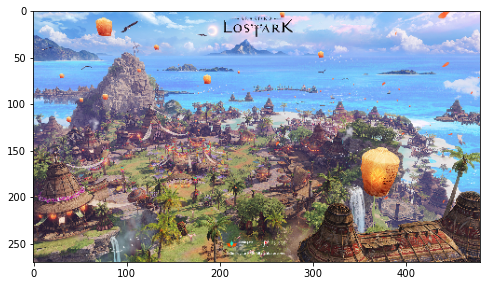

In [3]:
# 불러온 이미지에 bicubic interpolation을 적용해 가로, 세로 픽셀 수를 1/4로 줄임.

bicubic_image = cv2.resize(
    original_image, 
    dsize = (480, 270),
    interpolation = cv2.INTER_CUBIC # bicubic interpolation 적용.
)

print(bicubic_image.shape)
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(bicubic_image, cv2.COLOR_BGR2RGB))

In [4]:
# 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성.
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(bicubic_image)

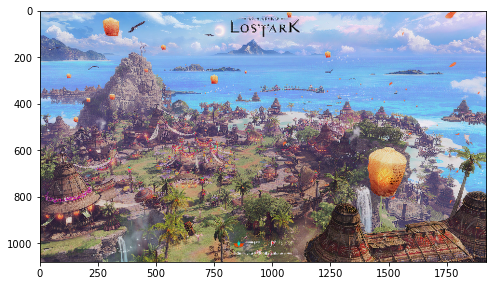

In [5]:
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(srgan_hr, cv2.COLOR_BGR2RGB))

(1080, 1920, 3)


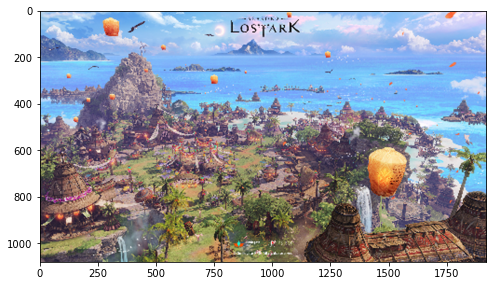

In [6]:
# 보간법을 사용한 이미지에 다시 bicubic interpolation을 적용해 
# 가로 및 세로 픽셀 수를 다시 4배로 늘리기.
bi_to_bi_image = cv2.resize(
    bicubic_image, 
    dsize = (1920, 1080), #(세로 픽셀 수, 가로 픽셀 수)
    interpolation = cv2.INTER_CUBIC # bicubic interpolation 적용.
)

print(bi_to_bi_image.shape)
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(bi_to_bi_image, cv2.COLOR_BGR2RGB))

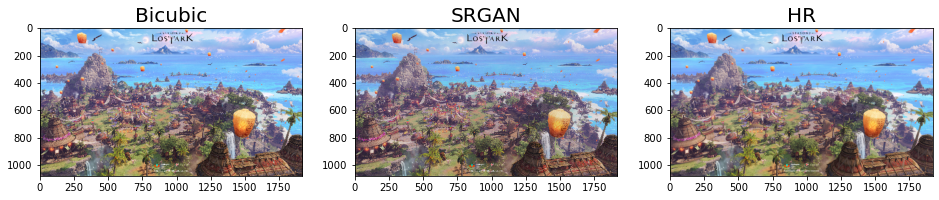

In [7]:
# 3개 이미지(Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지)를 나란히 시각화.
images = [bi_to_bi_image, srgan_hr, original_image]

# 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시.
titles = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

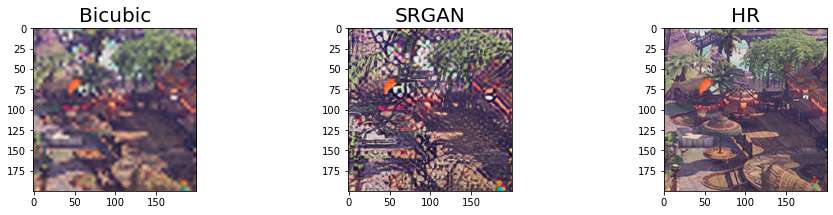

In [8]:
# 일부분을 잘라서 시각화.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

images = [bi_to_bi_image, srgan_hr, original_image]

titles = ["Bicubic", "SRGAN", "HR"]

left_top = (500, 1000) # 잘라낼 부분의 왼쪽 상단 좌표를 지정.

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(crop(images[i], left_top, 200, 200), cv2.COLOR_BGR2RGB))
    plt.title(titles[i], fontsize=20)

## 결과
**1. DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔나?**
- **1080x1920 크기일 때 3가지 사진에서 다른 점을 찾기 어려웠다. 그래서 그림 중 일부분을 잘라 확인해보았다. 그 결과, HR이 가장 선명했고, 그 다음 SRGAN이 선명하고, Bicubic이 가장 흐리게 나온 것으로 확인되었다. 하지만 SRGAN은 선명도가 너무 높은 탓어 텍스처에 이질감이 돋보인다.**    


**2. 왜 이러한 결과가 나왔을까?**
- **HR이 해상도가 가장 높은 이유는 말할 것도 없이 픽셀의 개수가 많기 때문에 부분만 잘라서 봐도 선명하다. SRGAN이 텍스처에 이질감이 돋보이는 이유는 Generator가 고해상도 이미지를 생성하는 과정에서 Discriminator를 속이기 위해 이미지를 진짜 같이 선명하게 만들도록 학습 되었기 때문일 것이다. 그리고 Bicubic이 흐린 이유는 사진의 크기를 억지로 늘려 늘어난 셀 안에 보간법으로 존재하는 셀의 거리비를 통해 임의로 숫자를 넣어서 빈 셀을 매꾸었기 때문이다.**

****

## Project 1-2: 저해상도 사진, SRGAN 비교하기

(334, 256, 3)


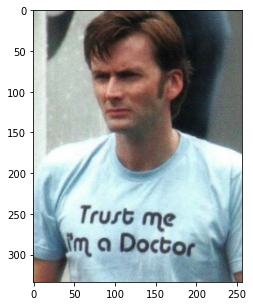

In [9]:
# 저해상도 이미지 불러오기.
image_path = os.getenv('HOME')+'/aiffel/super_resolution/doctor.png'
original_image = cv2.imread(image_path) 

print(original_image.shape) #(세로 픽셀 수, 가로 픽셀 수)
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

In [10]:
# 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성.
# 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성.
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

srgan_hr = apply_srgan(original_image)

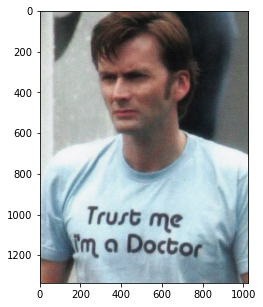

In [11]:
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(srgan_hr, cv2.COLOR_BGR2RGB))

(1336, 1024, 3)


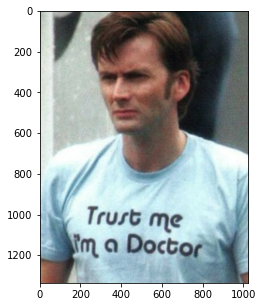

In [12]:
# 처음에 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘리기.
bicubic_image = cv2.resize(
    original_image, 
    dsize = (1024, 1336), #(세로 픽셀 수, 가로 픽셀 수)
    interpolation = cv2.INTER_CUBIC # bicubic interpolation 적용.
)

print(bicubic_image.shape)
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(bicubic_image, cv2.COLOR_BGR2RGB))

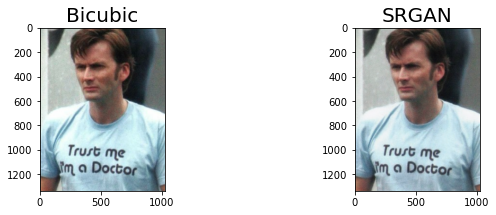

In [13]:
# 2개 이미지(Bicubic의 결과, SRGAN의 결과)를 나란히 시각화.
images = [bicubic_image, srgan_hr]

# 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시.
titles = ["Bicubic", "SRGAN"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

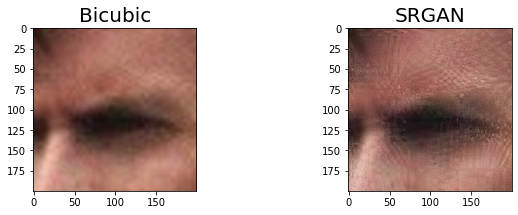

In [14]:
# 일부분을 잘라서 시각화.
images = [bicubic_image, srgan_hr]

titles = ["Bicubic", "SRGAN"]

left_top = (200, 360) # 잘라낼 부분의 왼쪽 상단 좌표를 지정.

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(crop(images[i], left_top, 200, 200), cv2.COLOR_BGR2RGB))
    plt.title(titles[i], fontsize=20)

## 결과
**1. DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔나?**
- **저해상도 사진과 SRGAN으로 만든 사진을 1336x1024 크기로 비교해봤을 때는 큰 차이점을 느끼지 못했다. 그저 SRGAN 사진이 좀더 뽀샤시하게 나왔을 뿐이다.**    


**2. 왜 이러한 결과가 나왔을까?**
- **SRGAN이 저해상도 사진을 보간법으로 늘린 사진보다 더 뽀샤시하게 나온 이유는 하얀부분은 더 하얗게, 검은 부분은 더 검게 보정하여 뚜렷하게 만들려는 Generator 때문인 것 같다. 얼굴에서 상대적으로 하얀 부분은 더 하얗게 됨을 SRGAN에서 볼 수 있었다.**

****

# Project 2. SRGAN을 이용해 고해상도 gif 생성하기

## Step 1. 파일 불러오기

[GIF 파일 다운받기](https://drive.google.com/drive/folders/1OLsa4btdwNUiVJcOJgZe_C6-lwEoNr4e)

In [15]:
# 다운받은 GIF 파일의 각 프레임 불러오기.
import cv2

# 다운받은 파일의 경로를 설정.
gif = cv2.VideoCapture("/home/aiffel-dj20/aiffel/super_resolution/fire_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))
print("frame 타입 :", type(frames[0]))

frame 수 : 14
frame 크기 : (282, 300, 3)
frame 타입 : <class 'numpy.ndarray'>


## Step 2. 프레임 별 Super Resolution 진행하기

In [16]:
# Bicubic interpolation로 가로, 세로 픽셀 수 4배 늘리기. --> frames_sr_bi에 넣기.
frames_sr_bi = []

for i in frames:
    bicubic_image = cv2.resize(i, dsize = (1200, 1128), interpolation = cv2.INTER_CUBIC)
    frames_sr_bi.append(bicubic_image)     
    
len(frames_sr_bi)    

14

In [17]:
# SRGAN을 이용해 가로, 세로 픽셀 수를 4배로 늘리기. --> frames_sr_srgan에 넣기.
frames_sr_srgan = []

for i in frames:
    frames_sr_srgan.append(apply_srgan(i))
       
len(frames_sr_srgan)    

14

## Step 3. 프레임을 합쳐 gif 만들기

In [30]:
import imageio

# Bicubic interpolation로 super resolution한 이미지로 만든 gif.
imageio.mimsave("고해상도_bi.gif", frames_sr_bi)

# SRGAN으로 super resolution한 이미지로 만든 gif.
imageio.mimsave("고해상도_srgan.gif", frames_sr_srgan)

## Step 4. Jupyter notebook에 gif 표시하기

In [37]:
from IPython.display import Image as show_gif

# 저해상도
# show_gif("/home/aiffel-dj20/aiffel/super_resolution/fire_lr.gif", width=500)

In [35]:
# 고해상도_bi
# show_gif("고해상도_bi.gif", width=500)

In [36]:
# 고해상도_srgan
# show_gif("고해상도_srgan.gif", width=500)

**파일이 커서 깃헙에 올라가지 않는 관계로 따로 gif 동영상 링크를 올림.**    
**네이버 블로그에 해당 영상들을 포스팅함. 벨로그는 영상이 안올라감.**


[영상 확인 링크](https://blog.naver.com/kje1502/222277828192)

*****

# 루브릭 평가

|**평가문항**|**상세기준**|
|:-----|:-----|
|**1. SRGAN을 이용해 고해상도의 이미지를 생성하였다.**|**SRGAN을 통해 생성된 이미지를 제출하였다.**|
|**2. 다양한 해상도의 이미지에 대해 시각화를 통해 원본, SRGAN생성본, interpolation생성본을 비교분석하였다.**|**이미지의 특성과 super resolution 방법을 관련지어 생성 결과를 체계적으로 분석하였다.**|
|**3. 저해상도 gif 동영상을 고해상도 동영상으로 성공적으로 변환하였다.**|**저해상도 원본 gif와 생성된 고해상도 gif의 해상도 차이가 시각적으로 확인 가능하다.**|

**1. SRGAN을 통해 고해상도 이미지를 생성하는 것에는 모두 성공했다. 하지만 SRGAN의 특징적인 이질감 때문에 고해상도로 바꿔도 사람의 눈엔 그닥 화질이 좋아보이지는 않았다.**    


**2. 원본, 보간법을 사용한 이미지, SRGAN을 사용한 이미지를 비교해보고 그에 따른 결과를 적어보았다. 모두 전체 이미지를 보았을 땐 구별이 어려웠는데, 일부를 crop하여 보니 차이점이 확연하게 들어났다.**    

**3. 보간법과 SRGAN을 사용하여 2개의 고화질 영상을 만들었다. 하지만 보간법으로 보정한 gif 동영상은 일반 저화질 gif 동영상과 큰 차이점을 느끼진 못했다. 보간법은 크기를 키워주는 것 말고는 특별한 기능이 없는 것 같다. SRGAN으로 보정한 gif 동영상만이 화질이 선명해짐을 보여주고 있다.**   

# 회고

**저화질 이미지를 고화질 이미지로 바꾸는 것은 거의 연금술과 같다는 것을 느꼈다. 새삼 고화질 이미지가 얼마나 선명한지 알게 되었다. crop으로 잘라서 비교했을 때, 고화질 이미지의 압도적인 선명함에 정신이 아찔했다.**     


**솔직히 SRGAN으로 보정한 이미지는 이미지에 따라서 느낌이 다른 것 같다. 어떤 이미지는 고화질 이미지 만큼 보정이 잘되지만, 어떤 이미지는 극명한 선명함에 오히려 눈에 튀는 역효과가 난다.**    


**그래도 보간법이라는 좋은 방법을 알게되서 좋다. 고해상도로 바꾸는 방법이라기보단 이미지를 키우는 방법이라고 생각하면 유용한 기법인 것 같다.**    


**이번 프로젝트를 하면서 느낀 것은 '이미지는 애초에 고해상도 이미지를 구하는 것이 최고이고, 저해상도 이미지를 고화질로 바꾸는 것을 시도하는 건 차선이다'라는 것이다. 고해상도 이미지가 제일 짱이다.**